In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['font.sans-serif'] = ['simhei']
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
data = pd.read_csv('../data/xigua3.0.csv')
data

编号  色泽  根蒂  敲声  纹理  脐部  触感     密度    含糖率 好瓜
0    1  青绿  蜷缩  浊响  清晰  凹陷  硬滑  0.697  0.460  是
1    2  乌黑  蜷缩  沉闷  清晰  凹陷  硬滑  0.774  0.376  是
2    3  乌黑  蜷缩  浊响  清晰  凹陷  硬滑  0.634  0.264  是
3    4  青绿  蜷缩  沉闷  清晰  凹陷  硬滑  0.608  0.318  是
4    5  浅白  蜷缩  浊响  清晰  凹陷  硬滑  0.556  0.215  是
5    6  青绿  稍蜷  浊响  清晰  稍凹  软粘  0.403  0.237  是
6    7  乌黑  稍蜷  浊响  稍糊  稍凹  软粘  0.481  0.149  是
7    8  乌黑  稍蜷  浊响  清晰  稍凹  硬滑  0.437  0.211  是
8    9  乌黑  稍蜷  沉闷  稍糊  稍凹  硬滑  0.666  0.091  否
9   10  青绿  硬挺  清脆  清晰  平坦  软粘  0.243  0.267  否
10  11  浅白  硬挺  清脆  模糊  平坦  硬滑  0.245  0.057  否
11  12  浅白  蜷缩  浊响  模糊  平坦  软粘  0.343  0.099  否
12  13  青绿  稍蜷  浊响  稍糊  凹陷  硬滑  0.639  0.161  否
13  14  浅白  稍蜷  沉闷  稍糊  凹陷  硬滑  0.657  0.198  否
14  15  乌黑  稍蜷  浊响  清晰  稍凹  软粘  0.360  0.370  否
15  16  浅白  蜷缩  浊响  模糊  平坦  硬滑  0.593  0.042  否
16  17  青绿  蜷缩  沉闷  稍糊  稍凹  硬滑  0.719  0.103  否

In [3]:
data = data[['密度', '含糖率', '好瓜']]
data['好瓜'] = data['好瓜'].replace({"是": 1, "否": 0})
data

C:\Users\wangy\AppData\Local\Temp\ipykernel_16576\2683831932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['好瓜'] = data['好瓜'].replace({"是":1, "否":0})


密度    含糖率  好瓜
0   0.697  0.460   1
1   0.774  0.376   1
2   0.634  0.264   1
3   0.608  0.318   1
4   0.556  0.215   1
5   0.403  0.237   1
6   0.481  0.149   1
7   0.437  0.211   1
8   0.666  0.091   0
9   0.243  0.267   0
10  0.245  0.057   0
11  0.343  0.099   0
12  0.639  0.161   0
13  0.657  0.198   0
14  0.360  0.370   0
15  0.593  0.042   0
16  0.719  0.103   0

In [4]:
import sklearn.svm as svm

svm.__all__

['LinearSVC',
 'LinearSVR',
 'NuSVC',
 'NuSVR',
 'OneClassSVM',
 'SVC',
 'SVR',
 'l1_min_c']

In [5]:
from sklearn.svm import SVC

model = SVC()
model.fit(data[['密度', '含糖率']], data['好瓜'])
model.score(data[['密度', '含糖率']], data['好瓜'])

0.9411764705882353

In [6]:
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)
x, y = np.meshgrid(x, y)
disp_input = np.vstack((x.flatten(), y.flatten())).T
disp_predict = model.predict(disp_input)
disp_predict

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

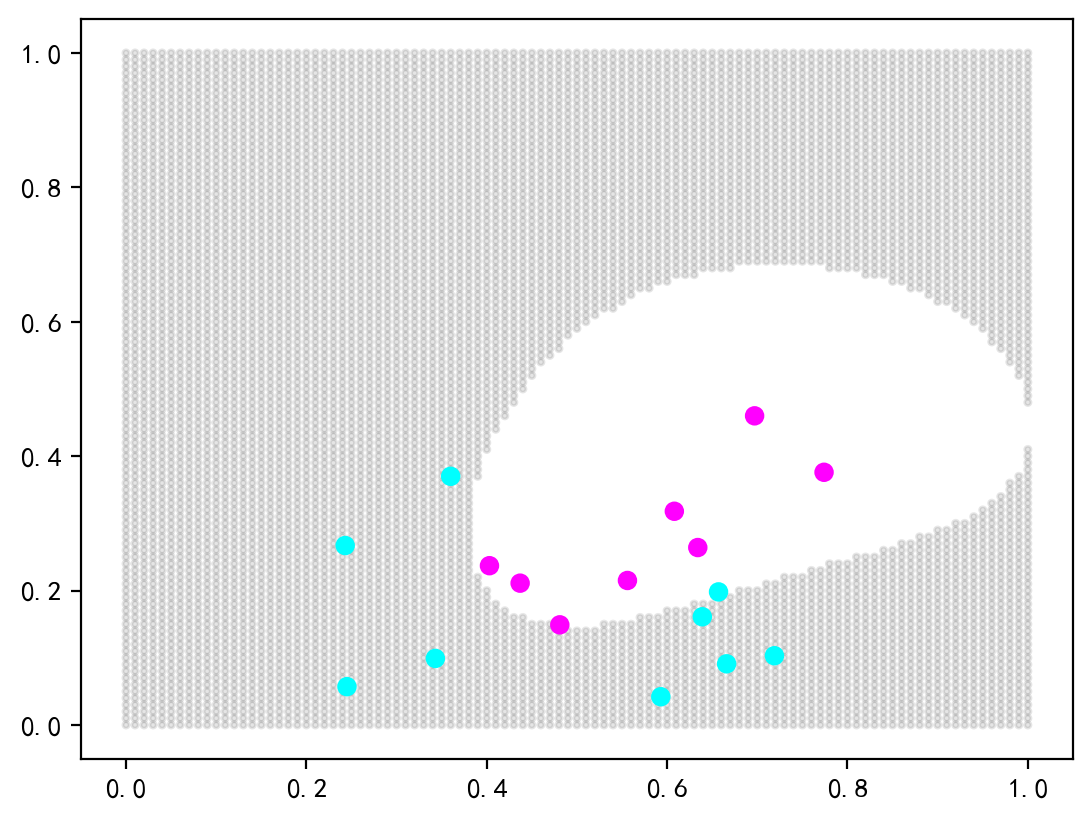

In [7]:
plt.figure(dpi=200)
plt.scatter(disp_input[:, 0], disp_input[:, 1], c=disp_predict, cmap='gray', alpha=0.1, s=5)
plt.scatter(data['密度'], data['含糖率'], c=data['好瓜'], cmap='cool')
plt.show()

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


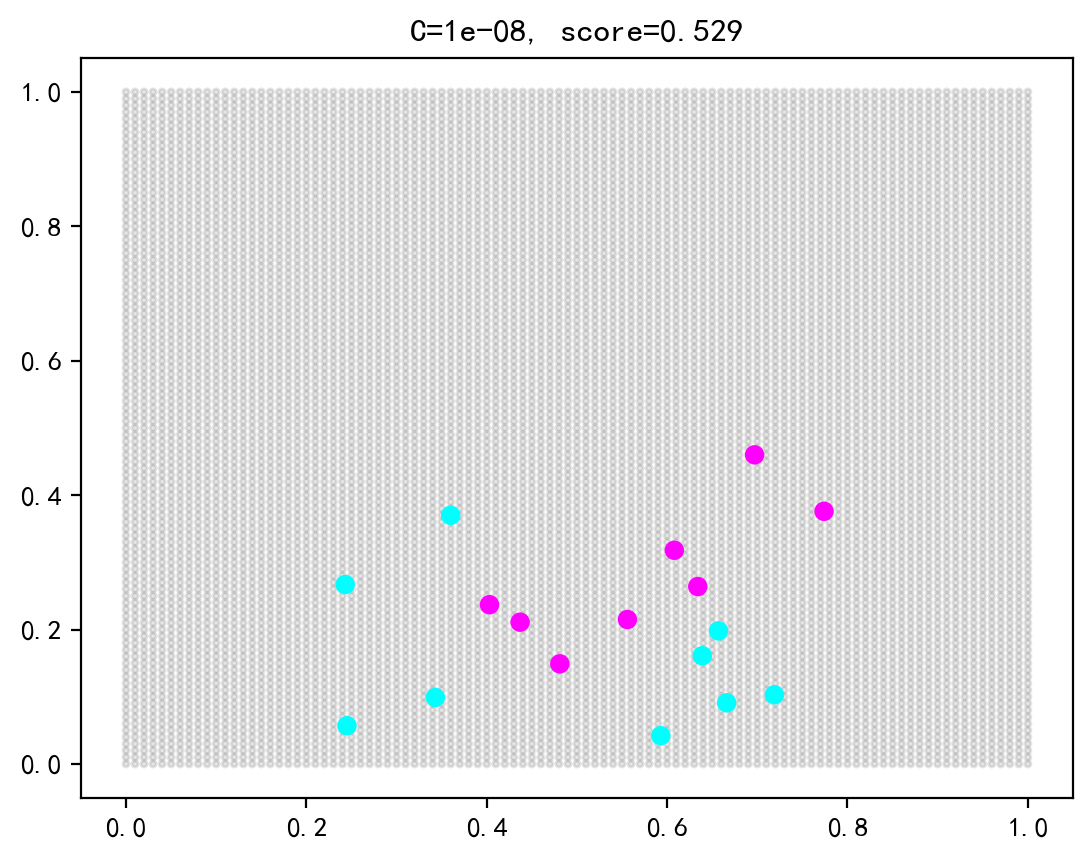

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


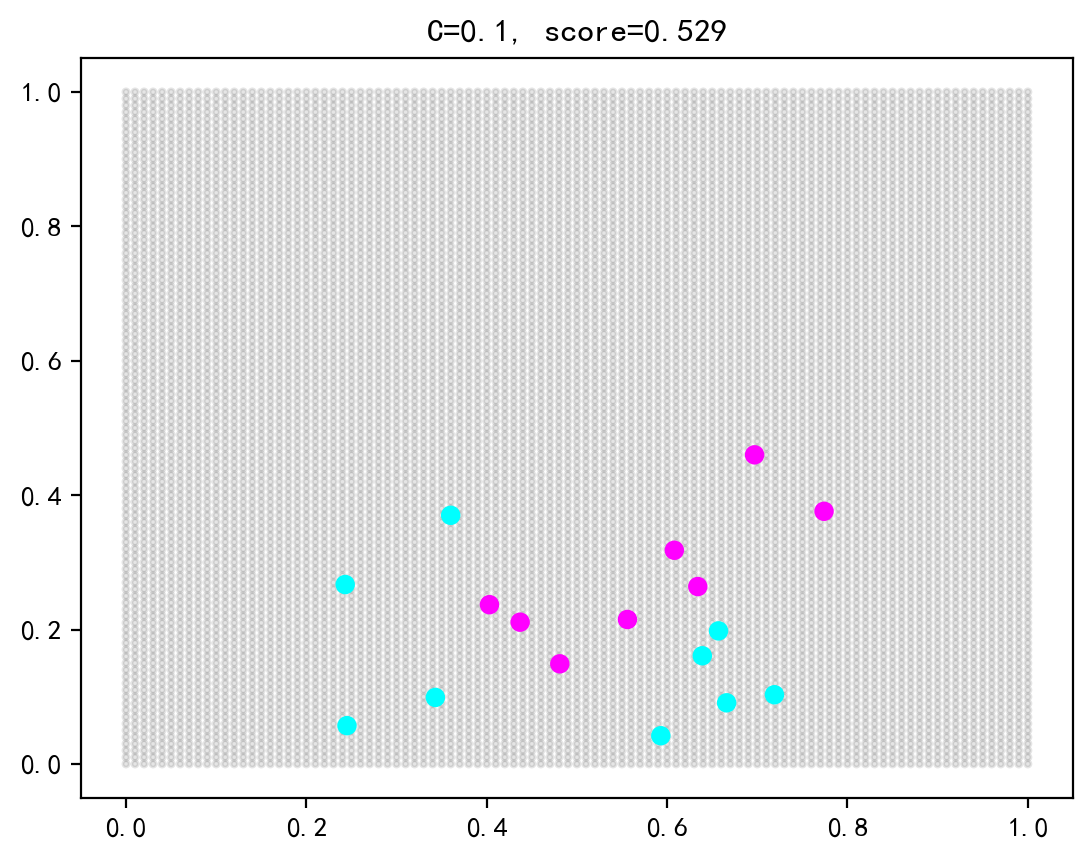

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


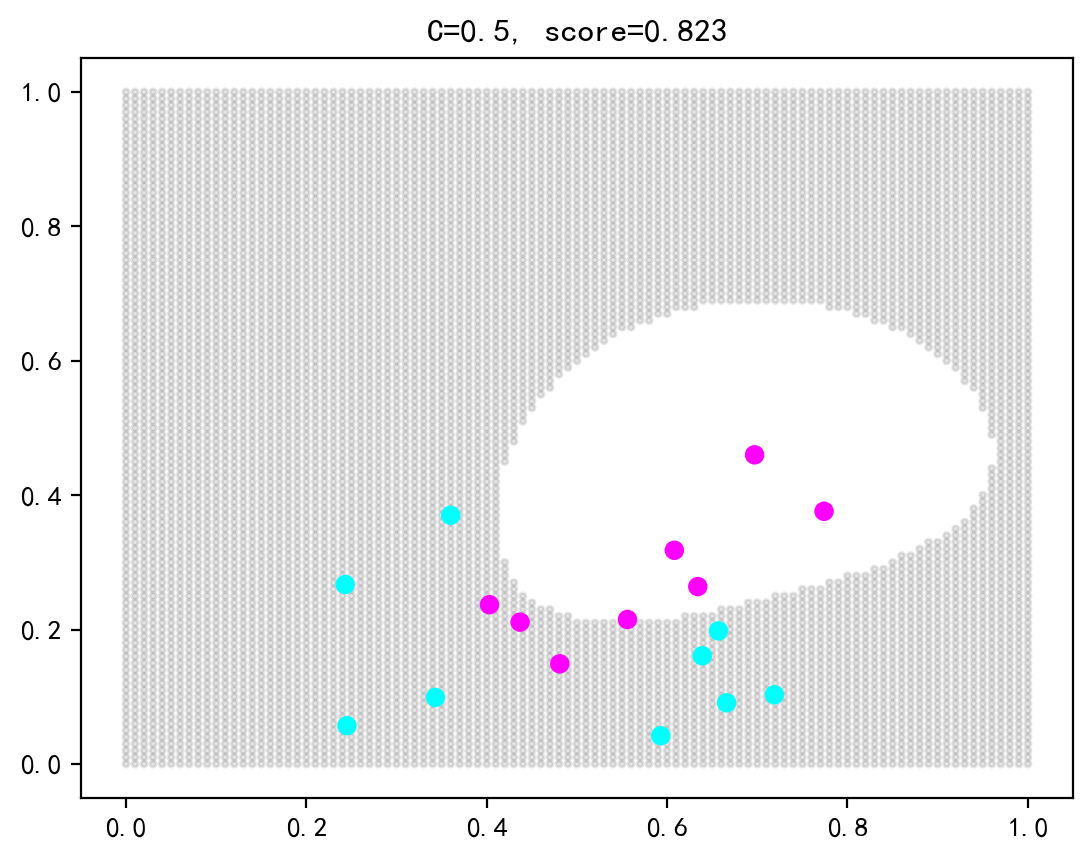

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


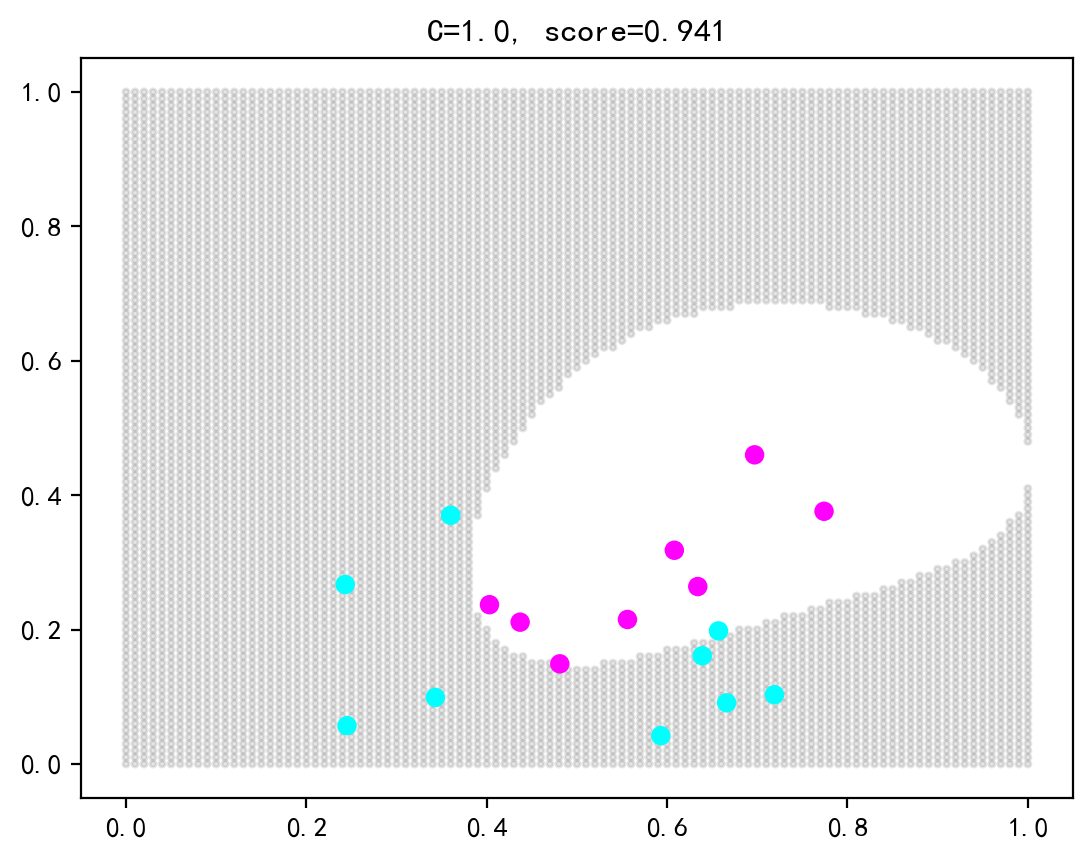

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


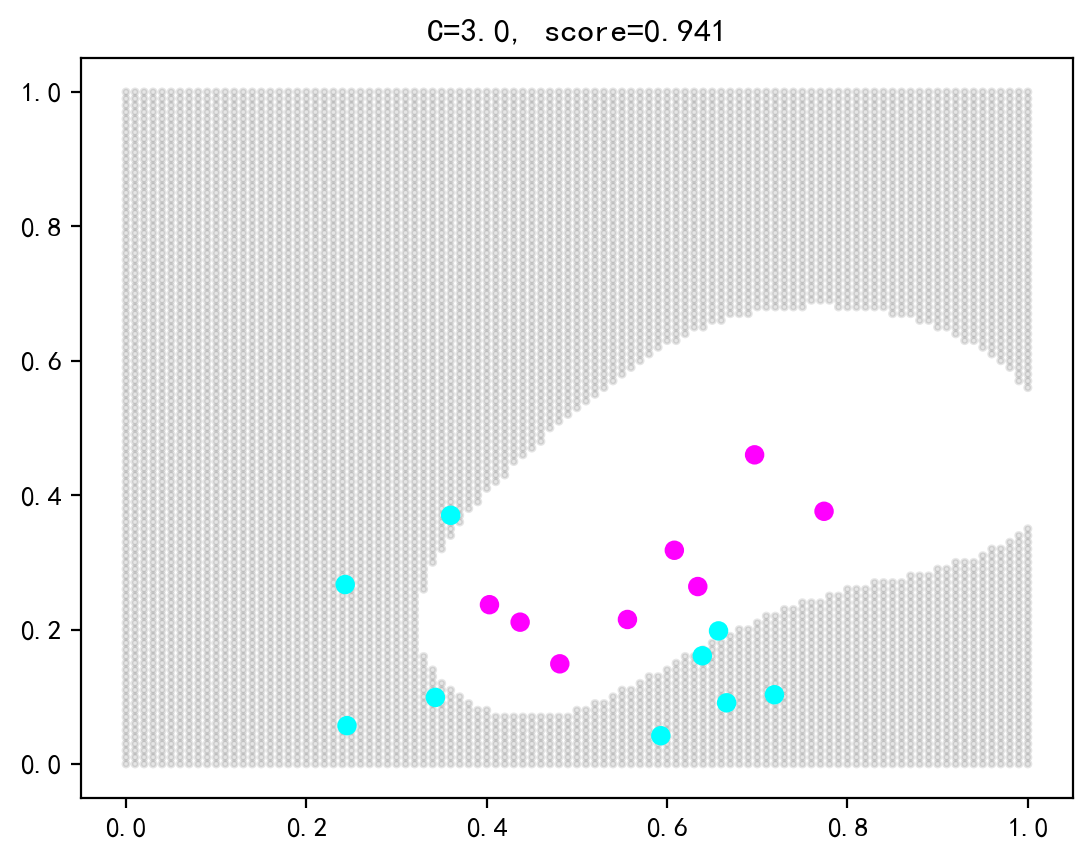

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


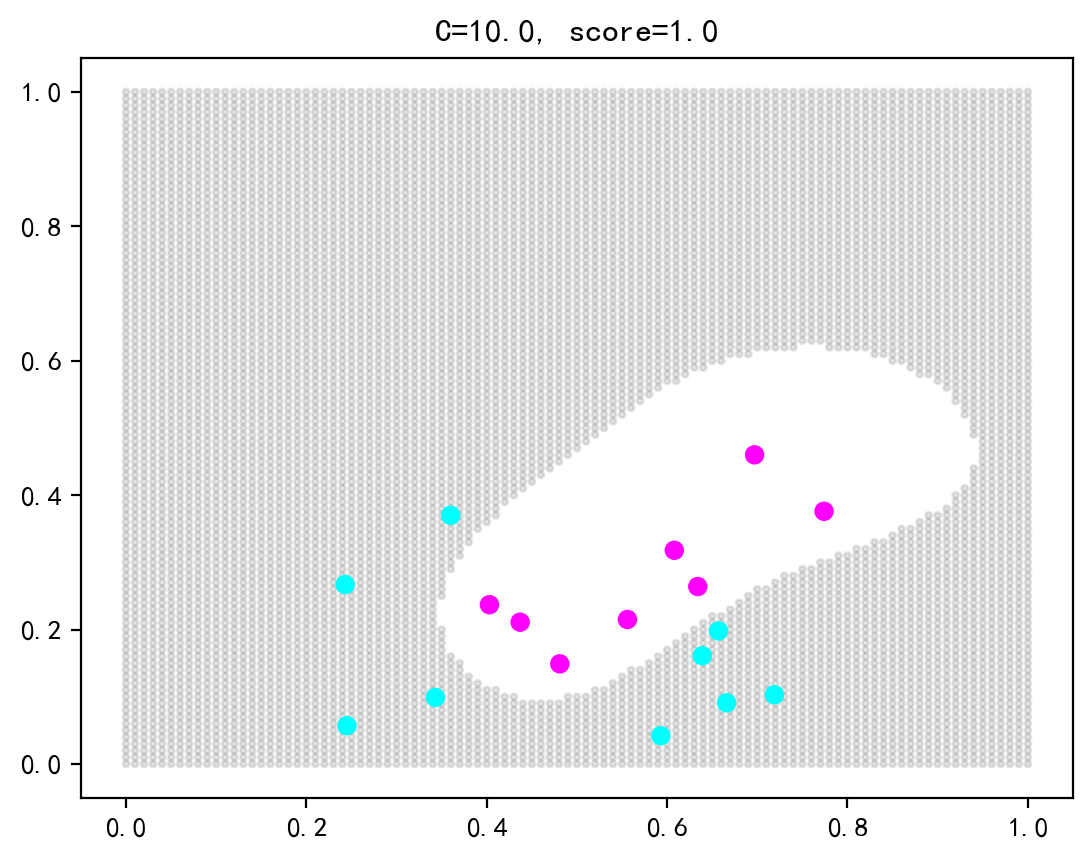

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


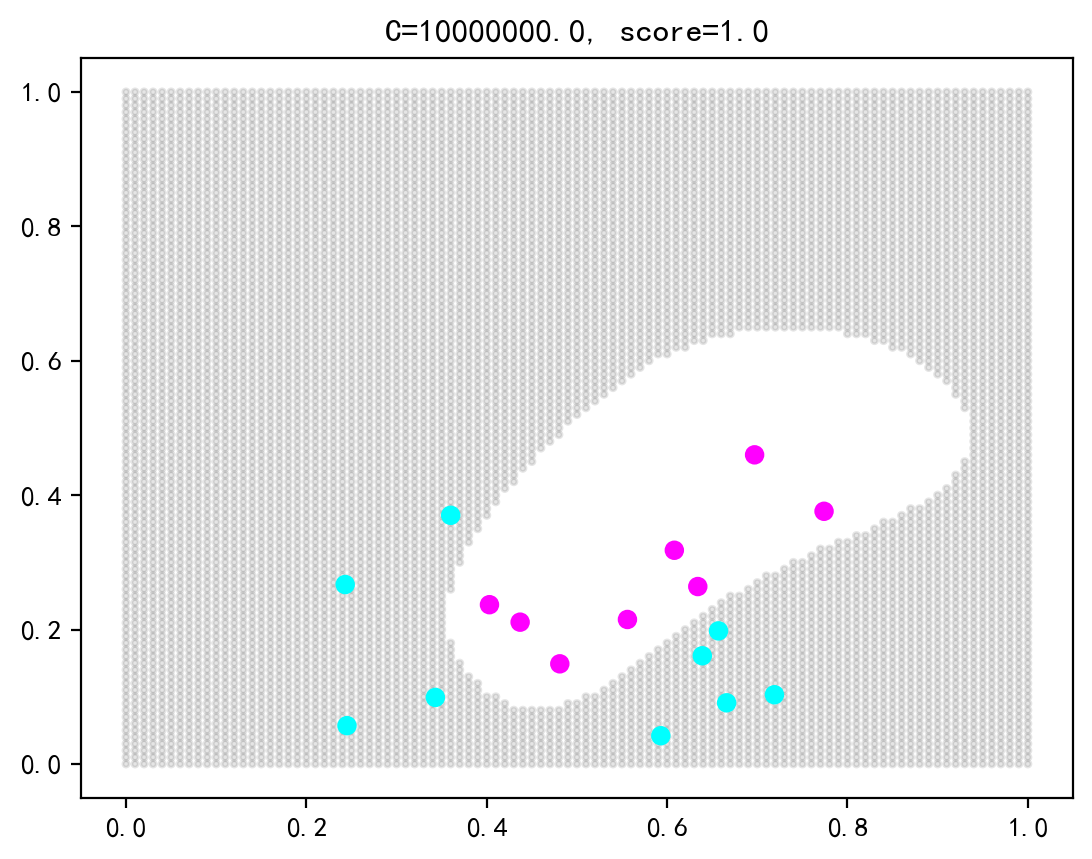

In [9]:
for cc in [0.00000001, 0.1, 0.5, 1.0, 3.0, 10.0, 10000000.0]:
    model = SVC(C=cc)
    model.fit(data[['密度', '含糖率']], data['好瓜'])
    disp_predict = model.predict(disp_input)
    plt.figure(dpi=200)
    plt.scatter(disp_input[:, 0], disp_input[:, 1], c=disp_predict, cmap='gray', alpha=0.1, s=5)
    plt.scatter(data['密度'], data['含糖率'], c=data['好瓜'], cmap='cool')
    plt.title("C={}, score={}".format(cc,
                                      str(model.score(data[['密度', '含糖率']], data['好瓜']))[:5]))
    plt.show()

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


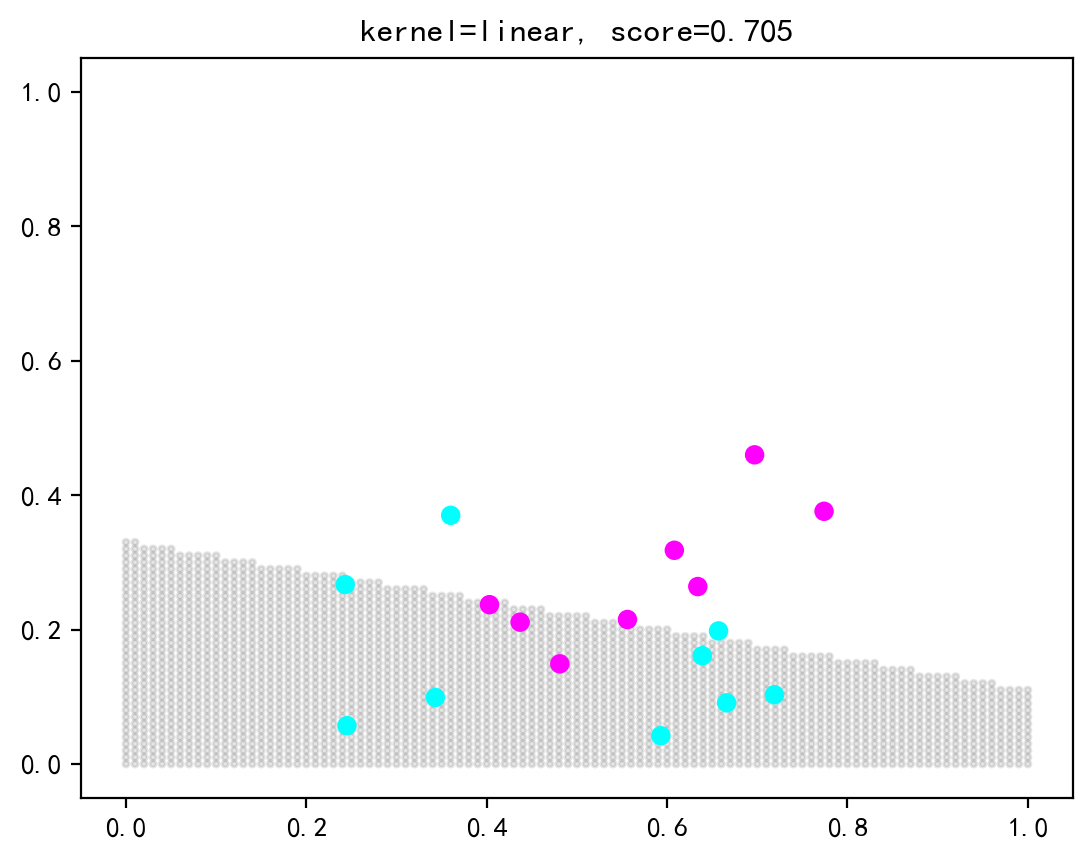

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


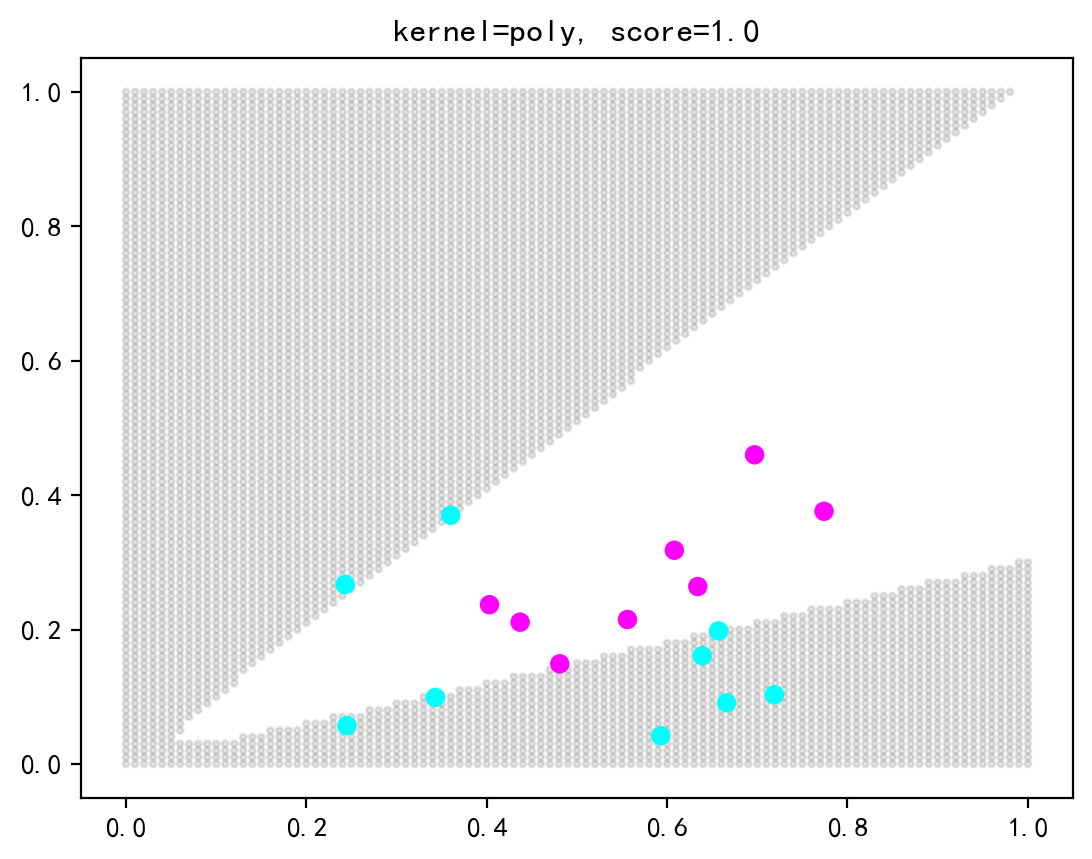

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


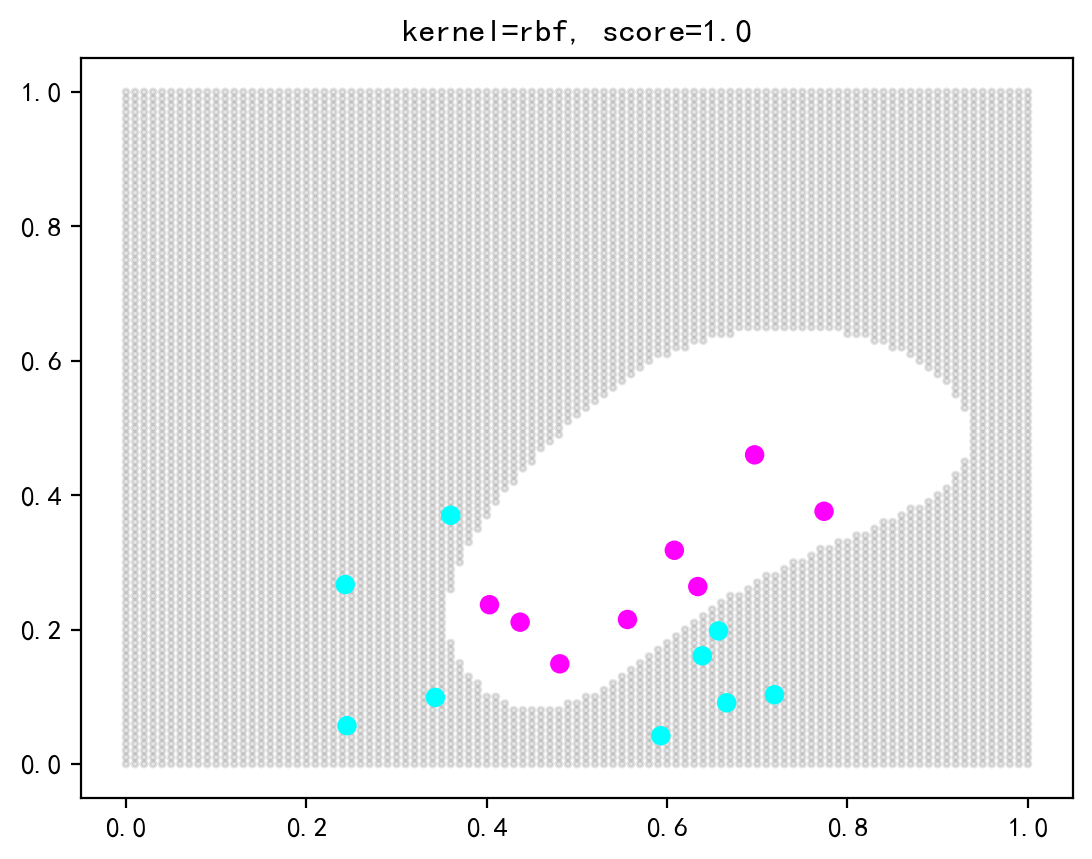

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


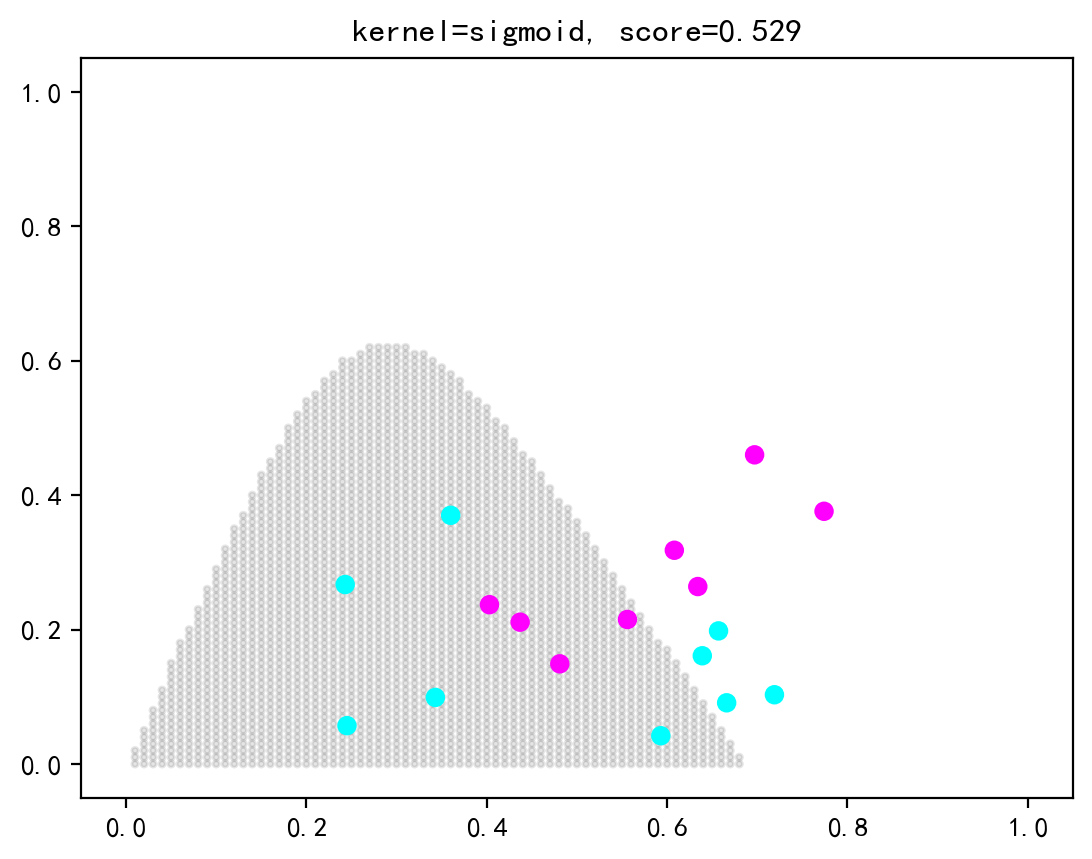

In [11]:
for kk in ['linear', 'poly', 'rbf', 'sigmoid']:
    model = SVC(kernel=kk, C=10000000000)
    model.fit(data[['密度', '含糖率']], data['好瓜'])
    disp_predict = model.predict(disp_input)
    plt.figure(dpi=200)
    plt.scatter(disp_input[:, 0], disp_input[:, 1], c=disp_predict, cmap='gray', alpha=0.1, s=5)
    plt.scatter(data['密度'], data['含糖率'], c=data['好瓜'], cmap='cool')
    plt.title("kernel={}, score={}".format(kk,
                                           str(model.score(data[['密度', '含糖率']], data['好瓜']))[:5]))
    plt.show()

C:\conda\venv\torch\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
 

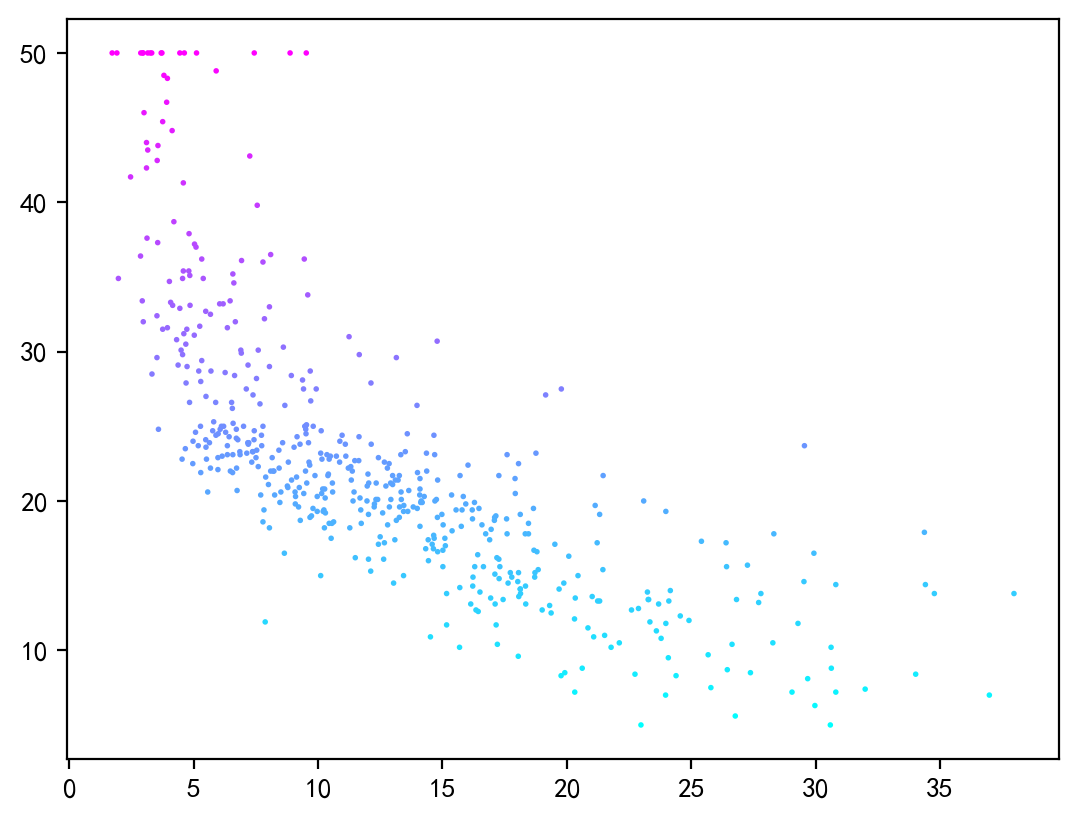

In [12]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_pd = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_2_data = boston_pd[['LSTAT']].values
boston_2_target = boston.target
plt.figure(dpi=200)
plt.scatter(boston_2_data, boston_2_target, c=boston_2_target, cmap='cool', s=1)
plt.show()

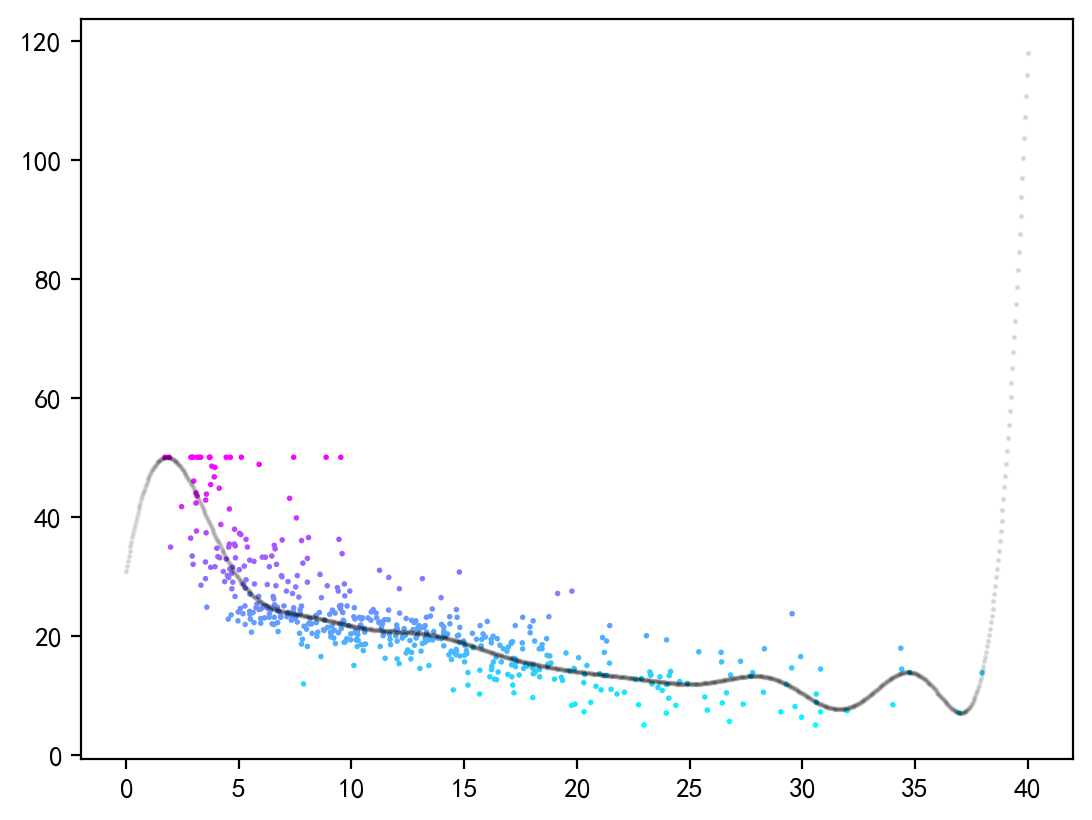

In [22]:
from sklearn.svm import SVR
model = SVR(C=1000000)
model.fit(boston_2_data, boston_2_target)

x_line = np.linspace(0, 40, 1000)
x_line = x_line.reshape((len(x_line), 1))

y_line = model.predict(x_line)
plt.figure(dpi=200)
plt.scatter(boston_2_data, boston_2_target, c=boston_2_target, cmap='cool', s=1)
plt.scatter(x_line, y_line, c='black', alpha=0.1, s=1)
plt.show()

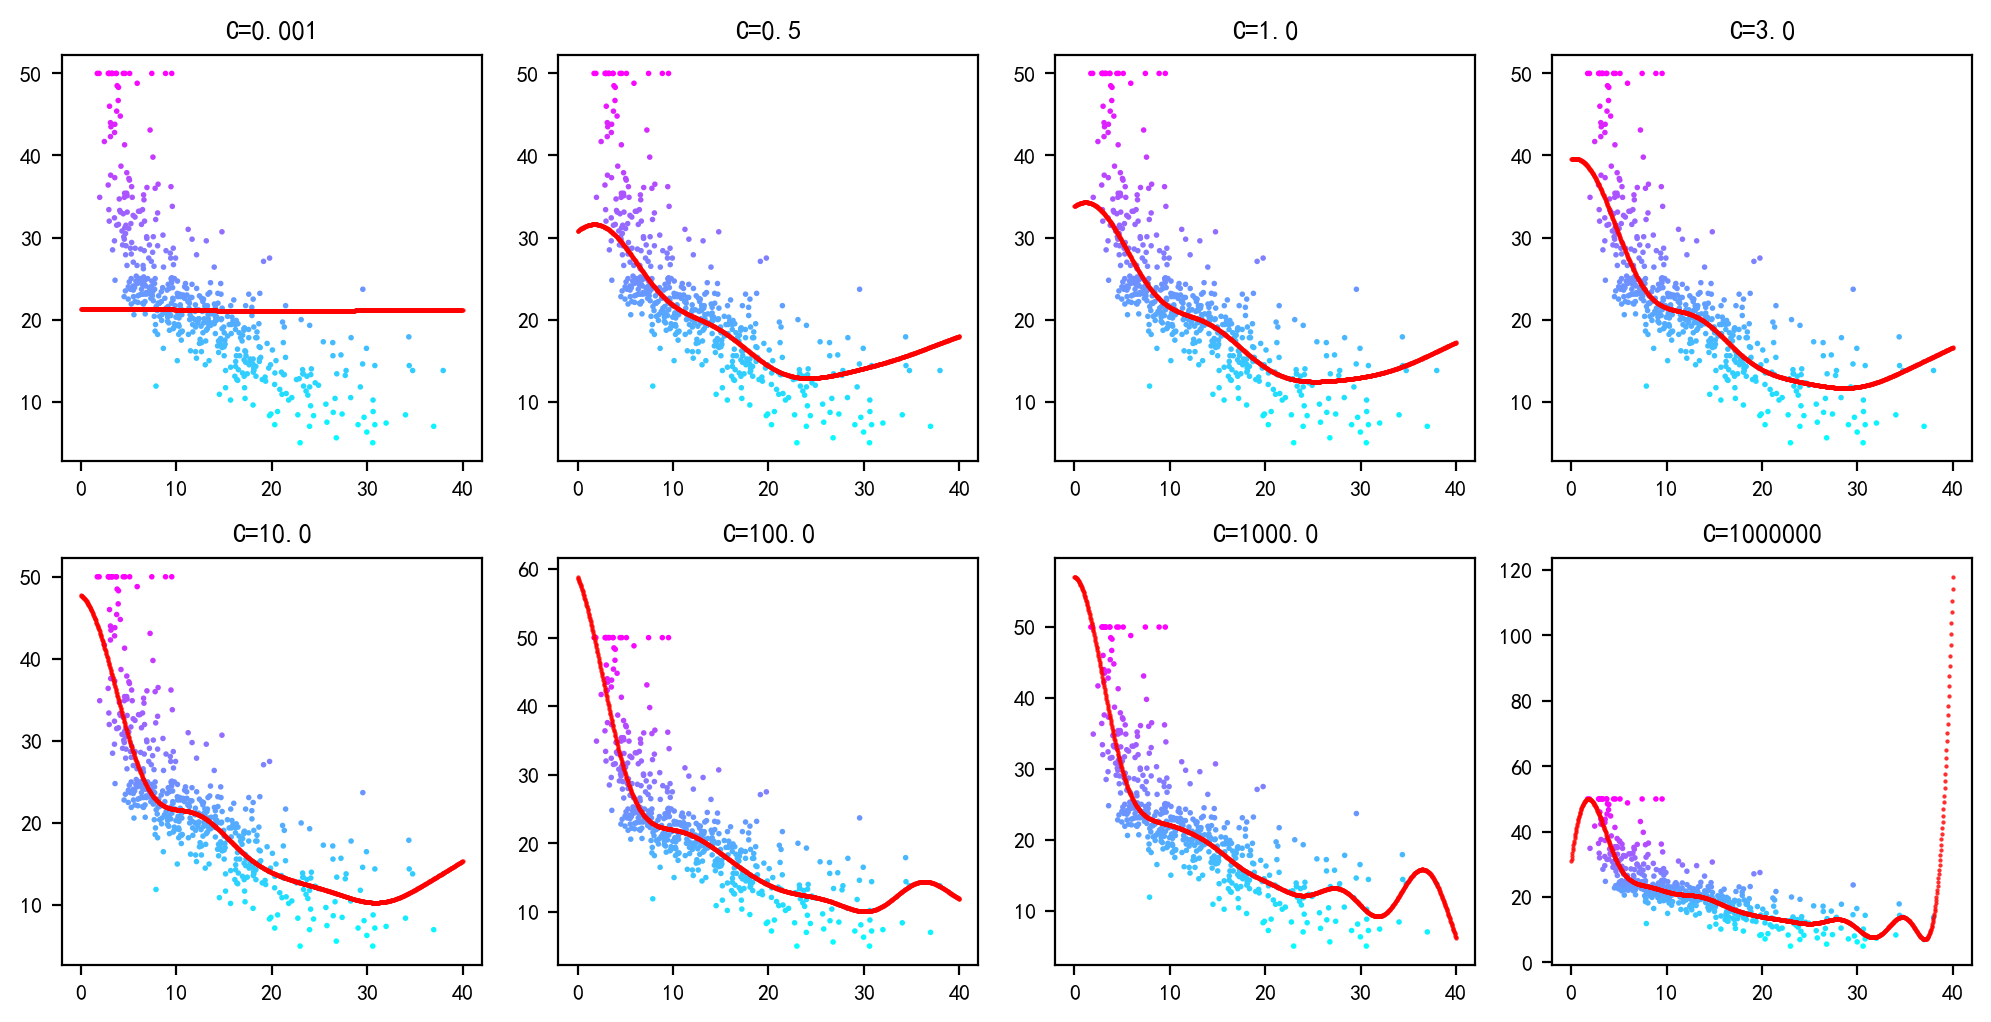

In [24]:
plt.rcParams['font.size'] = 8
plt.figure(figsize=[10, 10], dpi=200)
for cc, i in zip([0.001, 0.5, 1.0, 3.0, 10.0, 100.0, 1000.0, 1000000], range(1, 100)):
    model = SVR(C=cc)
    model.fit(boston_2_data, boston_2_target)
    y_line = model.predict(x_line)
    title = "C={}".format(cc)
    plt.subplot(4, 4, i)
    plt.scatter(boston_2_data, boston_2_target, c=boston_2_target, cmap='cool', s=1)
    plt.scatter(x_line, y_line, c='red', alpha=0.8, s=0.3)
    plt.title(title)
plt.tight_layout()
plt.show()